# HW3-1 

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [191]:
import pandas as pd
import numpy as np

In [192]:
data = {'國家':['Taiwan','Japan','Korea'] ,
        '人口': ['100','300','250']} 
population = pd.DataFrame(data)

In [193]:
print(population)

       國家   人口
0  Taiwan  100
1   Japan  300
2   Korea  250


## HW3-2

### 讀取 txt 檔
### 請讀取 text file
### 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt
### Hints: 使用 Request 抓取資料
### Hints: 字串分割
### Hints: 例外處理: Try-Except

In [194]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [195]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [196]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\t'
data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157'

## 將 txt 轉成 pandas dataframe

In [197]:
import pandas as pd

    
df = pd.DataFrame(data)
df = df.drop(0)
df.head()

,0
1,http://farm1.static.flickr.com/145/430300483_2...
2,http://farm2.static.flickr.com/1005/3352960681...
3,http://farm1.static.flickr.com/27/51009336_a96...
4,http://farm4.static.flickr.com/3025/2444687979...
5,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238


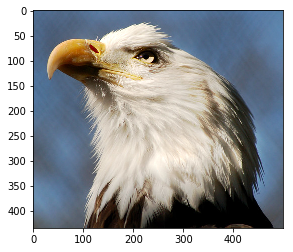

In [226]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[1,0]
print(first_link)
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array??
img = np.array(img)
plt.imshow(img)
plt.show()

In [199]:
df[0:5][0]

1    http://farm1.static.flickr.com/145/430300483_2...
2    http://farm2.static.flickr.com/1005/3352960681...
3    http://farm1.static.flickr.com/27/51009336_a96...
4    http://farm4.static.flickr.com/3025/2444687979...
5    http://img100.imageshack.us/img100/3253/forres...
Name: 0, dtype: object

In [222]:
url_list = df[0:5][0].values
url_list

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238',
       'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg\nn00015388_304',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg\nn00015388_327',
       'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg\nn00015388_355',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg\nn00015388_373'],
      dtype=object)

In [229]:
def img2arr_fromURLs(url_list):
    img_list=[]
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    # 請用 df.loc[...] 得到第一筆資料的連結
    try:
        for i in url_list:
            response = requests.get(i)
            img = Image.open(BytesIO(response.content))
            img = np.array(img)
        
            img_list.append(img)
    except:
        print("except")
    
    return img_list


In [230]:
result = img2arr_fromURLs(url_list)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉


except
Total images that we got: 4 
